In [204]:
import pandas as pd
import numpy as np

#1. Data Acquisition: Download the dataset from the provided link and load it into your
#preferred data analysis tool
Crime_data = pd.read_csv(r"C:\Users\ankur\Downloads\Crime_Data_from_2020_to_Present.csv")


In [205]:
#2. Data Inspection:
#o Display the first few rows of the dataset.
#o Check the data types of each column.
#o Review column names and descriptions, if available
print(Crime_data.head(5))
print("\n")
print(Crime_data.info())
print("\nThere are 28 columns in the dataset and 815882 records")

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

3. Data Cleaning:
o Identify and handle missing data appropriately.
o Check for and remove duplicate rows.
o Convert data types if needed (e.g., dates to date format, numerical values to
  appropriate numeric types).
o Deal with outliers if relevant to your analysis.
o Standardize or normalize numerical data as necessary.
o Encode categorical data if present

In [206]:
#checking the columns which might contain null values irrespective of datatype.
Crime_data.isnull().any()


DR_NO             False
Date Rptd         False
DATE OCC          False
TIME OCC          False
AREA              False
AREA NAME         False
Rpt Dist No       False
Part 1-2          False
Crm Cd            False
Crm Cd Desc       False
Mocodes            True
Vict Age          False
Vict Sex           True
Vict Descent       True
Premis Cd          True
Premis Desc        True
Weapon Used Cd     True
Weapon Desc        True
Status            False
Status Desc       False
Crm Cd 1           True
Crm Cd 2           True
Crm Cd 3           True
Crm Cd 4           True
LOCATION          False
Cross Street       True
LAT               False
LON               False
dtype: bool

In [207]:
#filling the Null values according to the provided string for Unknown values on the Crime Data website.
Crime_data['Vict Sex'].fillna('X', inplace = True)
Crime_data['Vict Descent'].fillna('X', inplace = True)

#dropping records which have Premise code as Null because the small number (5 columns) will not affect our analysis.
Crime_data.dropna(subset=['Premis Cd'])
Crime_data = Crime_data.reset_index(drop=True)

#No need to clean premis desc as we don't need it for our analysis. Also, no available data for it.
Crime_data['Premis Desc'].fillna('Unknown', inplace = True)

#for each blank weapon code, we do not have corresponding value of weapon desc
Crime_data['Weapon Used Cd'].fillna('0', inplace = True)
Crime_data['Weapon Desc'].fillna('Not available', inplace = True)

#No need to clean Crime code 1 and 2 as they have corresponding values for the crimes committed. Also, crime code 3 and 4 are not required.
#Not cleaning Cross street as all the values are empty.

In [208]:
Crime_data.to_csv('Cleaned_Crime_data.csv', index = True) 

In [209]:
#replacing Age 0yrs with mean of the Vict Age column
No_null = pd.read_csv(r"C:\Users\ankur\Downloads\Cleaned_Crime_data.xls")
No_null['Vict Age'] = No_null['Vict Age'].replace(0, No_null['Vict Age'].mean())


In [210]:
#We do not have any duplicates present in the dataset
No_null.duplicated().any()

#No need to encode the data as we alreayd have corresponding numerical data present for categorical columns

False

In [211]:
#No_null.to_csv('Cleaned_Crime_data_final.csv', index = True) 

4. Exploratory Data Analysis (EDA):
 
o Analyze and visualize seasonal patterns in crime data.
o Identify the most common type of crime and its trends over time.
o Investigate if there are any notable differences in crime rates between regions or
cities.
o Explore correlations between economic factors (if available) and crime rates.
o Analyze the relationship between the day of the week and the frequency of certain
types of crimes.


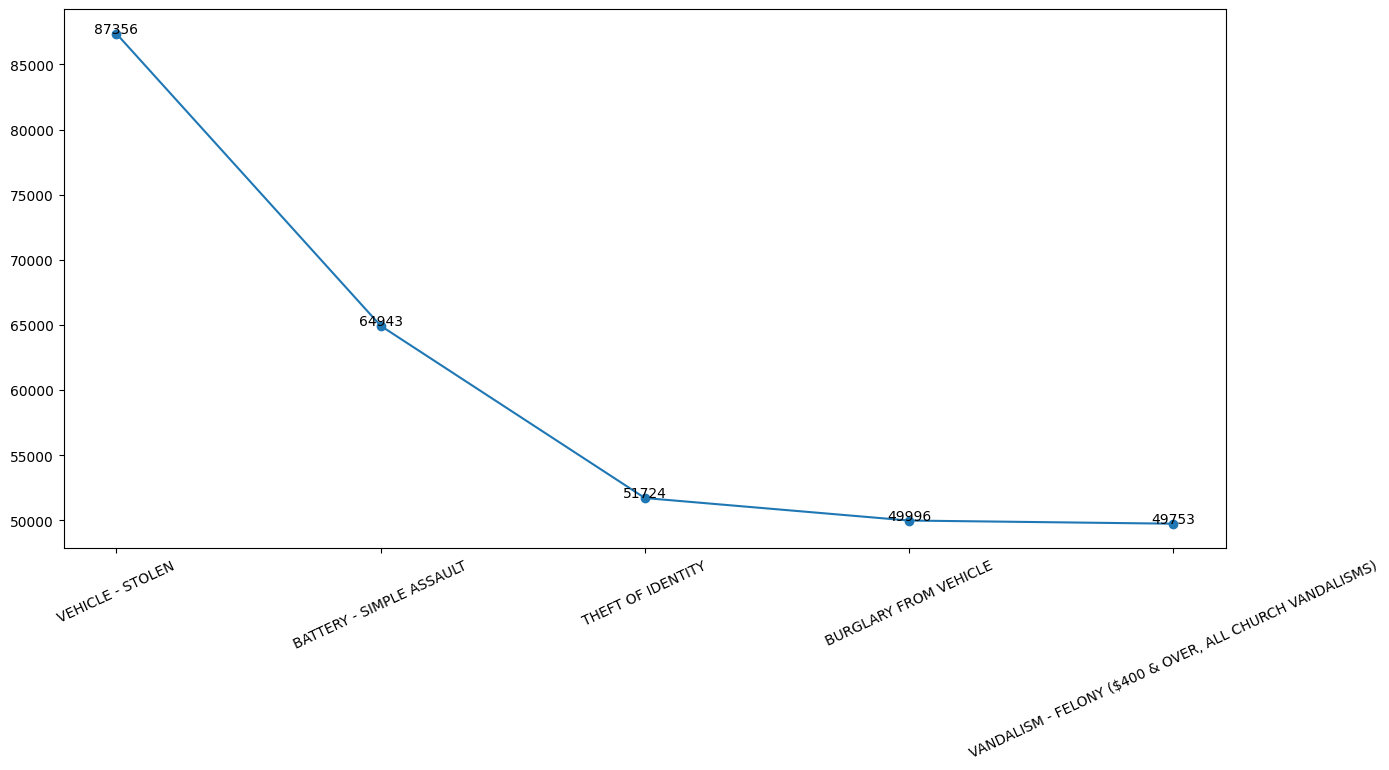

 Here we have visualuzed top 5 crimes occurences as a line plot


In [212]:
#Visualize overall crime trends from 2020 to the present year.
import matplotlib.pyplot as plt

Data = pd.read_csv("Cleaned_Crime_data_final.csv")

f = plt.figure() 
ax = f.add_subplot(111)
f.set_figwidth(15) 
f.set_figheight(7)
plt.xticks(rotation = 25)
for i, v in enumerate(Data['Crm Cd Desc'].value_counts().head(5)):
    ax.text(i, v+25, "%d" %v, ha="center")
plt.plot(Data['Crm Cd Desc'].value_counts().head(5),marker = 'o')
plt.show()

print(" Here we have visualuzed top 5 crimes occurences as a line plot")


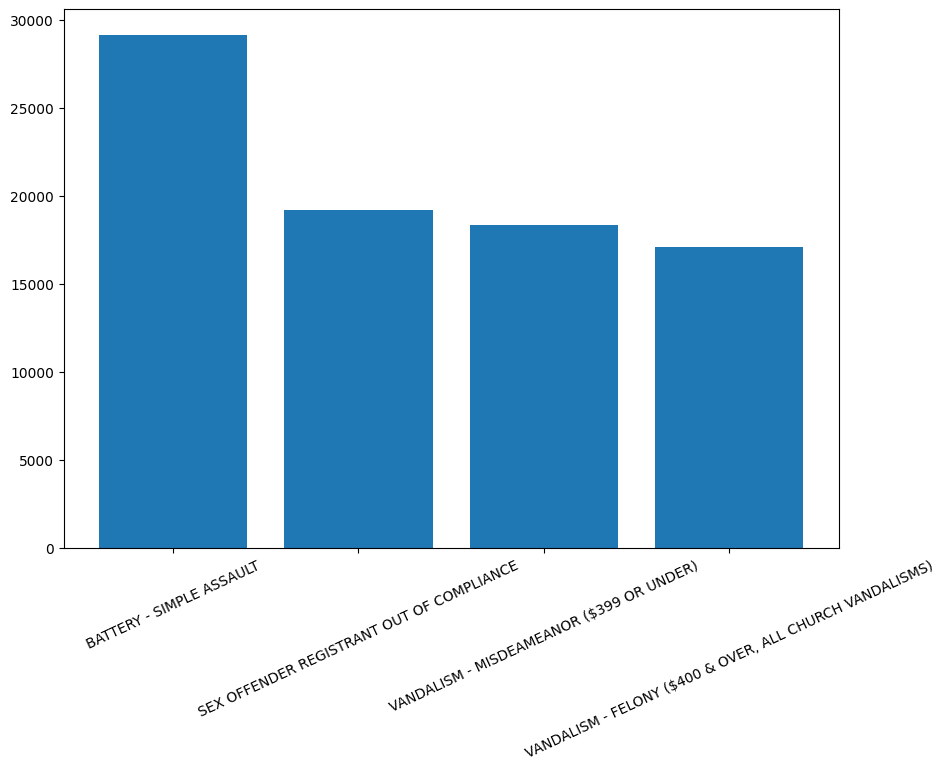

In [213]:
#Analyze and visualize seasonal patterns in crime data.

Data['DATE OCC'] = pd.to_datetime(Data['DATE OCC'])
Data['month'] = Data['DATE OCC'].dt.month

f = plt.figure() 
ax = f.add_subplot(111)
f.set_figwidth(10) 
f.set_figheight(7)
plt.xticks(rotation = 25)

DM = Data['Crm Cd Desc'].loc[Data['month'] <= 4]
    
plt.bar(DM.head(),height=DM.value_counts().head())
plt.show()


Looking the the scatter plot, we can see that most of the vehicles were stolen during the late evening or night time of the day



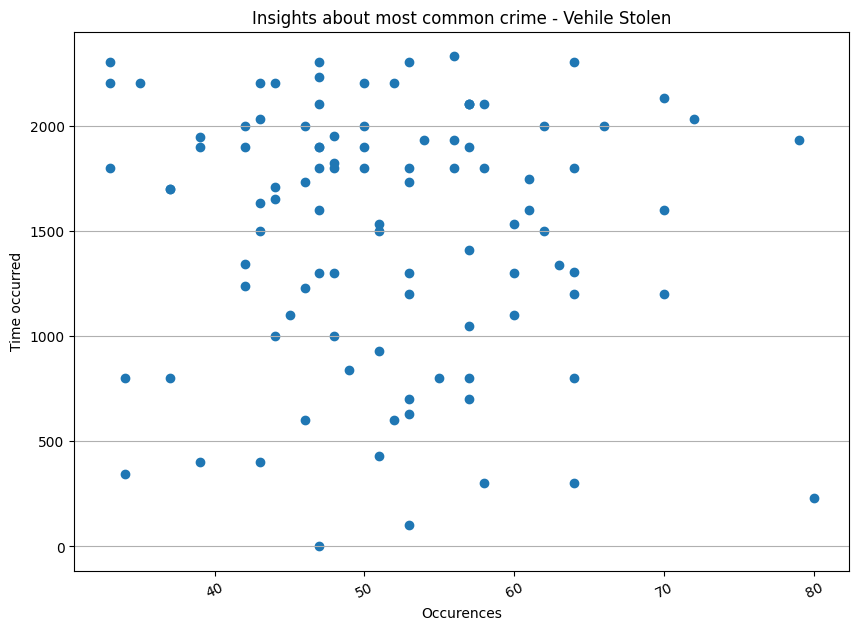

In [214]:
#Identify the most common type of crime and its trends over time.
copy = Data
copy['counts'] = copy['DATE OCC'].map(copy['DATE OCC'].loc[copy['Crm Cd Desc'] == 'VEHICLE - STOLEN'].value_counts())
f = plt.figure() 
ax = f.add_subplot(111)
f.set_figwidth(10) 
f.set_figheight(7)
plt.xticks(rotation = 25)
plt.grid(axis = 'y')

plt.title("Insights about most common crime - Vehile Stolen")
plt.xlabel("Occurences")
plt.ylabel("Time occurred")

plt.scatter(copy['counts'].loc[copy['Crm Cd Desc'] == 'VEHICLE - STOLEN'].head(100), copy['TIME OCC'].loc[copy['Crm Cd Desc'] == 'VEHICLE - STOLEN'].head(100))
print("\nLooking the the scatter plot, we can see that most of the vehicles were stolen during the late evening or night time of the day\n")


The below plot shows us that the crime occurrences in the Central, 77th Street, Pacific, Southwest and Hollywood are far more than other areas.



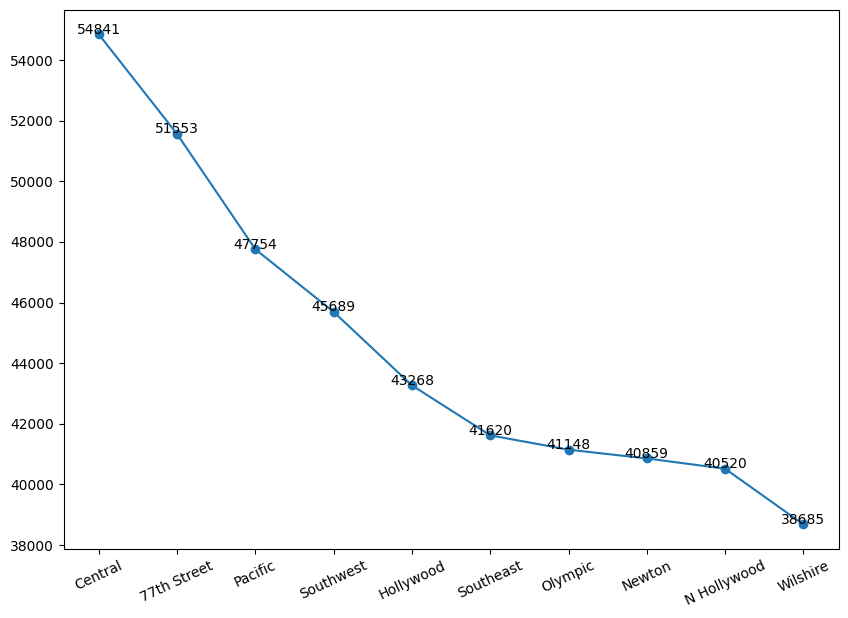

In [215]:
#Investigate if there are any notable differences in crime rates between regions or cities.

f = plt.figure() 
ax = f.add_subplot(111)
f.set_figwidth(10) 
f.set_figheight(7)
plt.xticks(rotation = 25)
for i, v in enumerate(Data['AREA NAME'].value_counts().head(10)):
    ax.text(i, v+25, "%d" %v, ha="center")
plt.plot(copy['AREA NAME'].value_counts().head(10), marker = 'o')
print("\nThe below plot shows us that the crime occurrences in the Central, 77th Street, Pacific, Southwest and Hollywood are far more than other areas.\n")

In [216]:
#Explore correlations between economic factors (if available) and crime rates.
print("We do not have any data to derive the correlation between economic factor and crime rates")

We do not have any data to derive the correlation between economic factor and crime rates



The below plot shows us that Most of the crimes occurred during the weekends



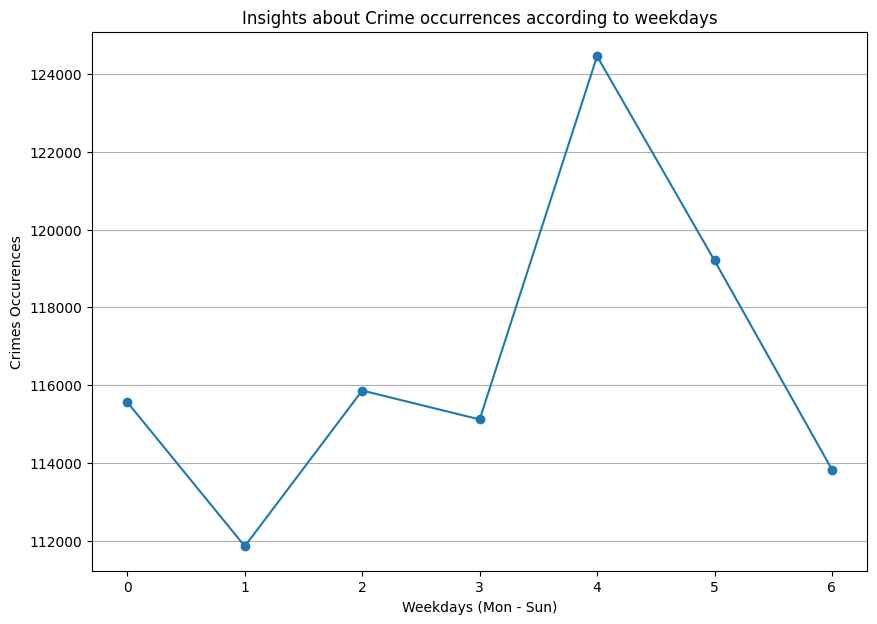

In [217]:
#Analyze the relationship between the day of the week and the frequency of certain types of crimes.
copy['weekday'] = copy['DATE OCC'].dt.weekday
f2 = plt.figure() 
ax2 = f2.add_subplot(111)
f2.set_figwidth(10) 
f2.set_figheight(7)
plt.grid(axis ='y')

plt.title("Insights about Crime occurrences according to weekdays")
plt.xlabel("Weekdays (Mon - Sun)")
plt.ylabel("Crimes Occurences")
    
plt.plot(copy.groupby('weekday')['Crm Cd Desc'].count(), marker ='o')
print("\nThe below plot shows us that Most of the crimes occurred during the weekends\n")



Find the solutions to these questions:
. Overall Crime Trends: Calculate and plot the total number of crimes per year to visualize the 
trends.

The total number of crimes per year: year
2020    199398
2021    209334
2022    234199
2023    172951
Name: count, dtype: int64


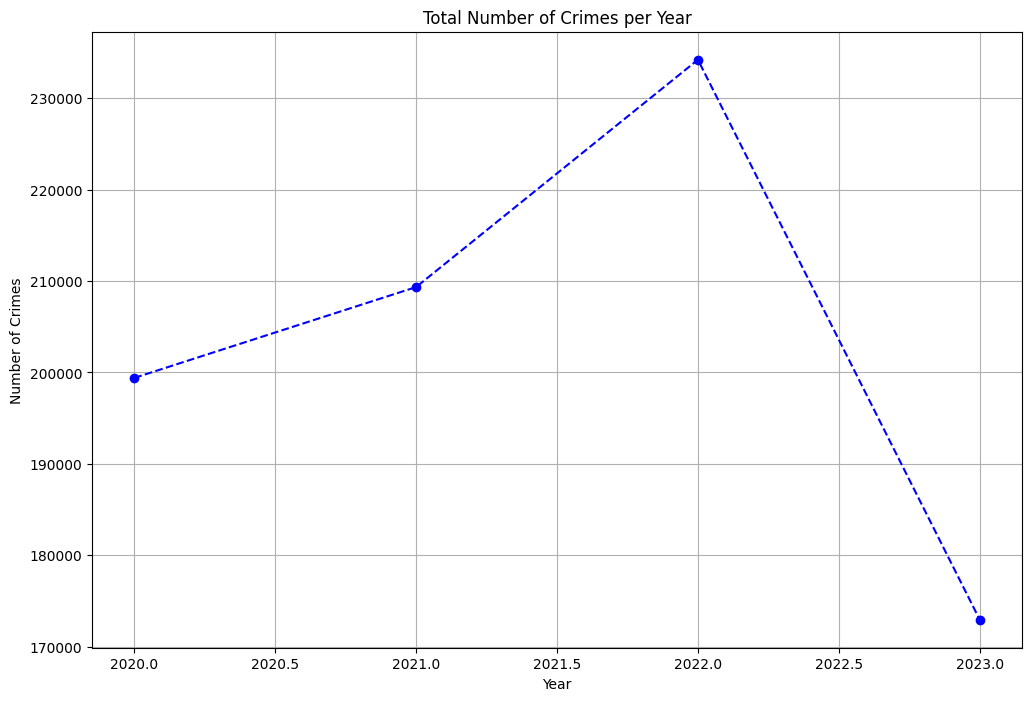

In [223]:
#1. Overall Crime Trends: Calculate and plot the total number of crimes per year to visualize the trends.
#To group the data by year and display the total number of crimes per year
crimes_per_year = Data['year'].value_counts().sort_index()
print("The total number of crimes per year:", crimes_per_year)
#To visualize the trends, line plot fits best to the data.
plt.figure(figsize=(12,8))
plt.plot(crimes_per_year.index, crimes_per_year.values, marker = 'o', linestyle= '--', color='b')
plt.title('Total Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid()
plt.show()

. Seasonal Patterns: Group the data by month and analyze the average number of crimes per month 
over the years.

Text(0, 0.5, 'Crimes')

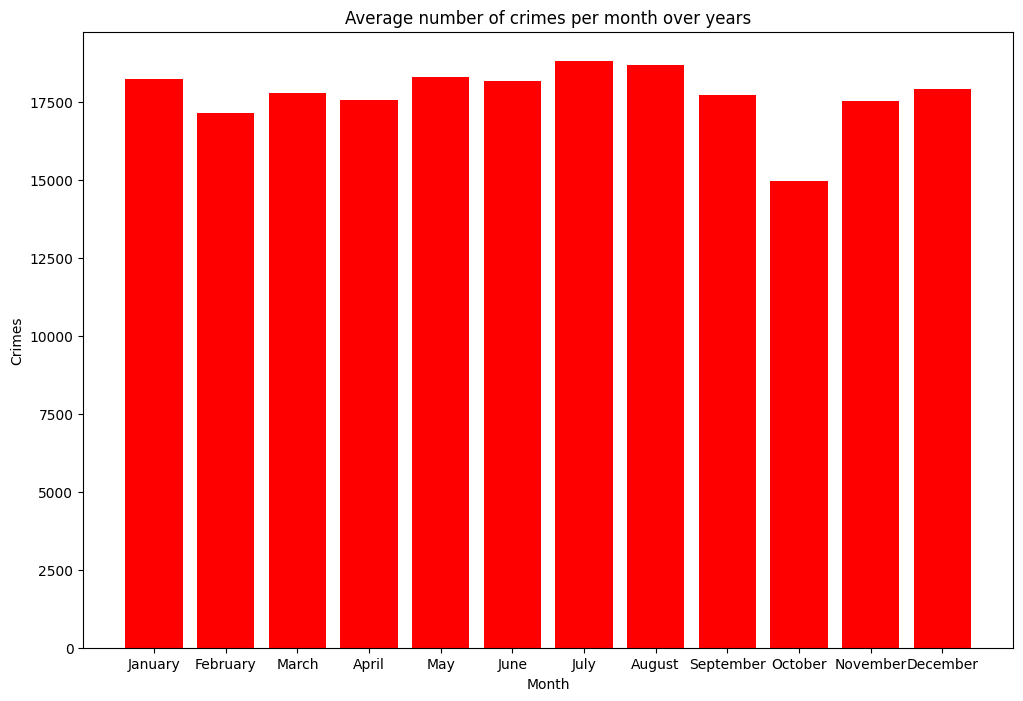

In [224]:
#Grouping the data by month and calculating average number of crimes per month over years
Crimes_by_month_over_years = Data.groupby(['year', 'month']).size().groupby('month').mean()

#Definign momths for labelling.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Displaying the average number of crimes per month over years sunign bar plot
plt.figure(figsize=(12, 8))
plt.bar(range(1, 13), Crimes_by_month_over_years, tick_label=months, color='r')
plt.title('Average number of crimes per month over years')
plt.xlabel('Month')
plt.ylabel('Crimes')

3. Most Common Crime Type:
Count the occurrences of each crime type and identify the one with the highest frequency

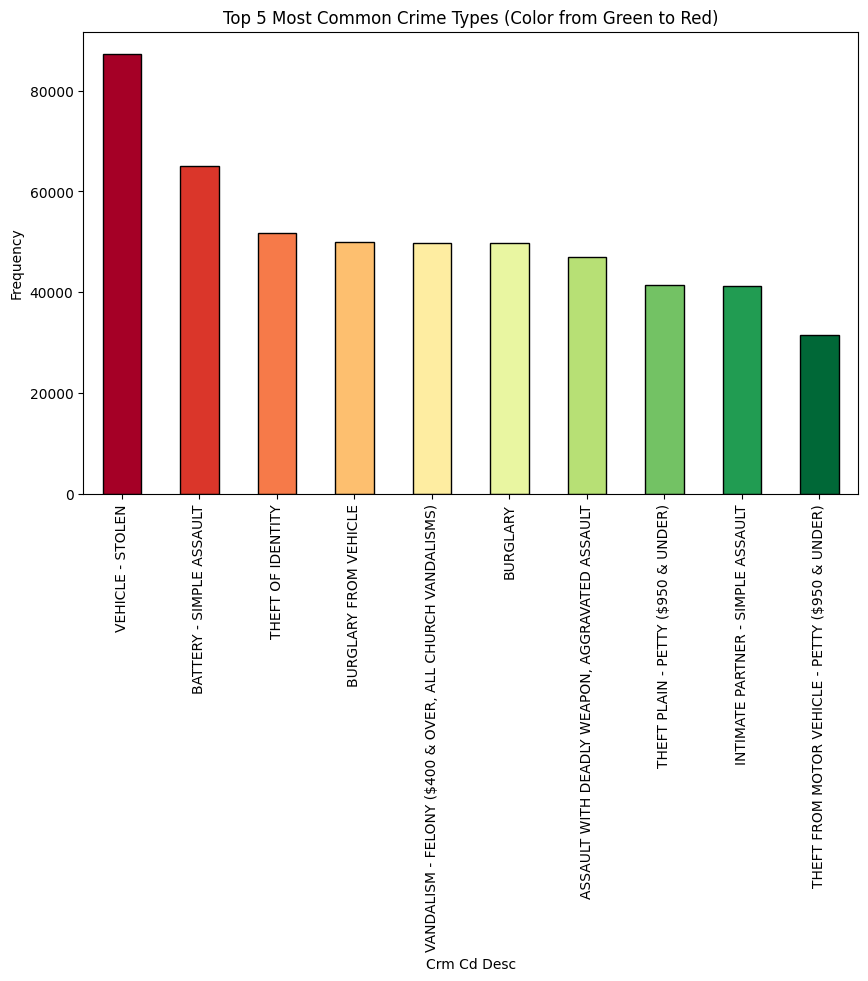

The most common crime type is: Crm Cd Desc
VEHICLE - STOLEN                                           87356
BATTERY - SIMPLE ASSAULT                                   64943
THEFT OF IDENTITY                                          51724
BURGLARY FROM VEHICLE                                      49996
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    49753
BURGLARY                                                   49658
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             46986
THEFT PLAIN - PETTY ($950 & UNDER)                         41463
INTIMATE PARTNER - SIMPLE ASSAULT                          41142
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            31537
Name: count, dtype: int64


In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

crime_type_counts = Data['Crm Cd Desc'].value_counts()
most_common_crime_types = crime_type_counts.head(10)
plt.figure(figsize=(10, 6))

colors = plt.cm.RdYlGn(np.linspace(0, 1, len(most_common_crime_types)))

most_common_crime_types_sorted = most_common_crime_types.sort_values(ascending=False)
most_common_crime_types_sorted.plot(kind='bar', edgecolor='black', color=colors)

plt.ylabel('Frequency')
plt.title('Top 5 Most Common Crime Types (Color from Green to Red)')
plt.xticks(rotation=90)
plt.show()



print(f"The most common crime type is: {most_common_crime_types}")


4. Regional Differences:
Group the data by region or city and compare crime rates between them using descriptive statistics or visualizations.

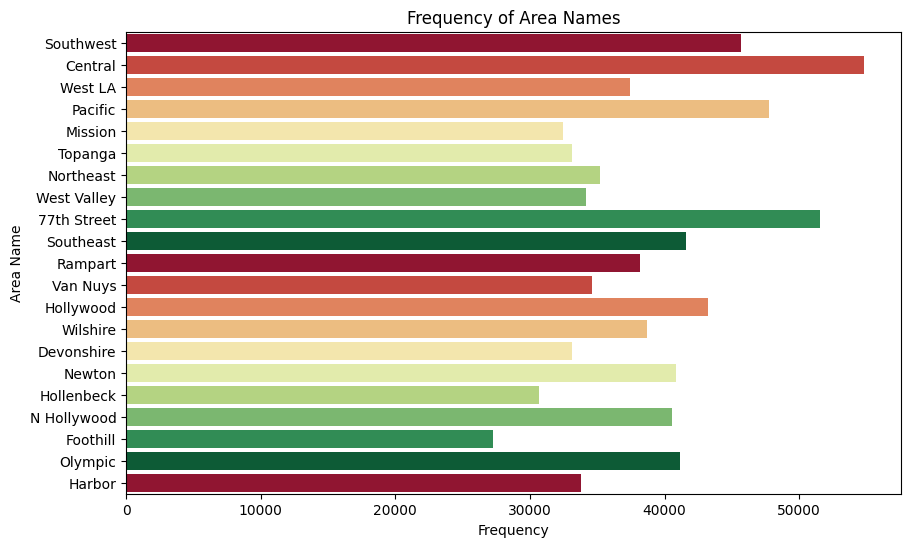

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = Data

area_name_counts = crime_data['AREA NAME'].value_counts().head(10)

plt.figure(figsize=(10, 6))

colors = plt.cm.RdYlGn(np.linspace(0, 1, len(area_name_counts)))

area_name_counts_sorted = area_name_counts.sort_values(ascending=False)

sns.countplot(y='AREA NAME', data=crime_data, palette=colors)
plt.ylabel('Area Name')
plt.xlabel('Frequency')
plt.title('Frequency of Area Names')
plt.show()

5. Correlation with Economic Factors:
Collect economic data for the same time frame and use statistical methods like correlation analysis to assess the relationship between economic factors and crime rates

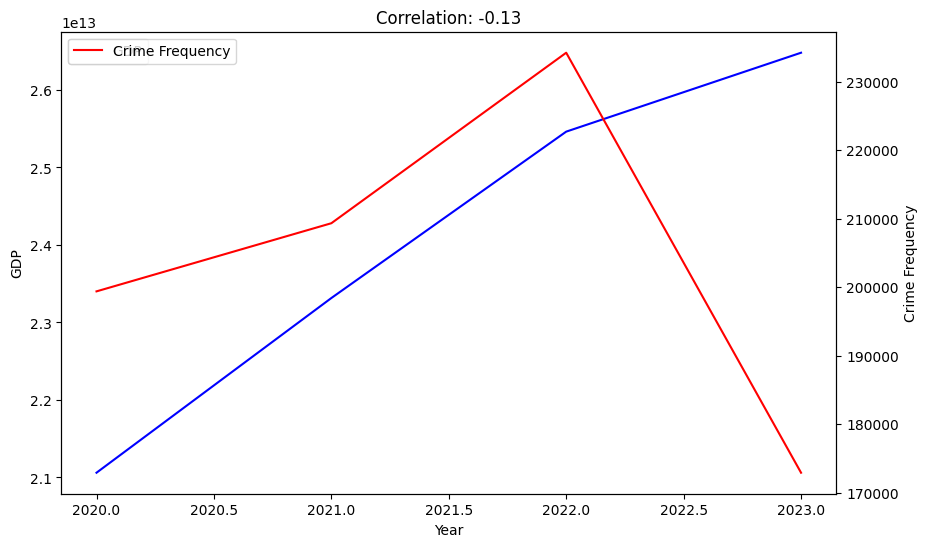

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = pd.read_csv('Cleaned_Crime_data_final.csv')
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
crime_data['Year'] = crime_data['DATE OCC'].dt.year

# Data for U.S. GDP
data = {
    'Year': [2020, 2021, 2022, 2023],
    'GDP': [21060473613000, 23315080560000, 25462700000000, 26481208000000]
}

US_Eco = pd.DataFrame(data)

crime_frequency = crime_data['Year'].value_counts().reset_index()
crime_frequency.columns = ['Year', 'CrimeFrequency']

merged_data = US_Eco.merge(crime_frequency, on='Year')

correlation = merged_data['GDP'].corr(merged_data['CrimeFrequency'])

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='GDP', data=merged_data, color='blue', label='GDP')
ax.set_ylabel('GDP')

ax2 = ax.twinx()
sns.lineplot(x='Year', y='CrimeFrequency', data=merged_data, color='red', label='Crime Frequency')
ax2.set_ylabel('Crime Frequency')

plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()



6. Day of the Week Analysis:
Group the data by day of the week and analyze crime frequencies for each day

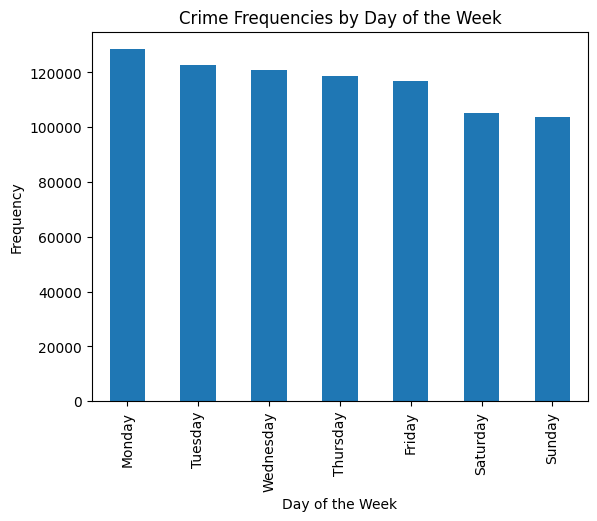

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Cleaned_Crime_data_final.csv')

data['Date Rptd'] = pd.to_datetime(data['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
data['DayOfWeek'] = data['Date Rptd'].dt.day_name()

day_counts = data['DayOfWeek'].value_counts()

day_counts.plot(kind='bar')
plt.title('Crime Frequencies by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()


7. Impact of Major Events:
o Identify major events or policy changes during the dataset period and analyze crime
rate changes before and after these events.

Top 5 Crimes
Crm Cd Desc
VEHICLE - STOLEN                                           87356
BATTERY - SIMPLE ASSAULT                                   64943
THEFT OF IDENTITY                                          51724
BURGLARY FROM VEHICLE                                      49996
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    49753
Name: count, dtype: int64


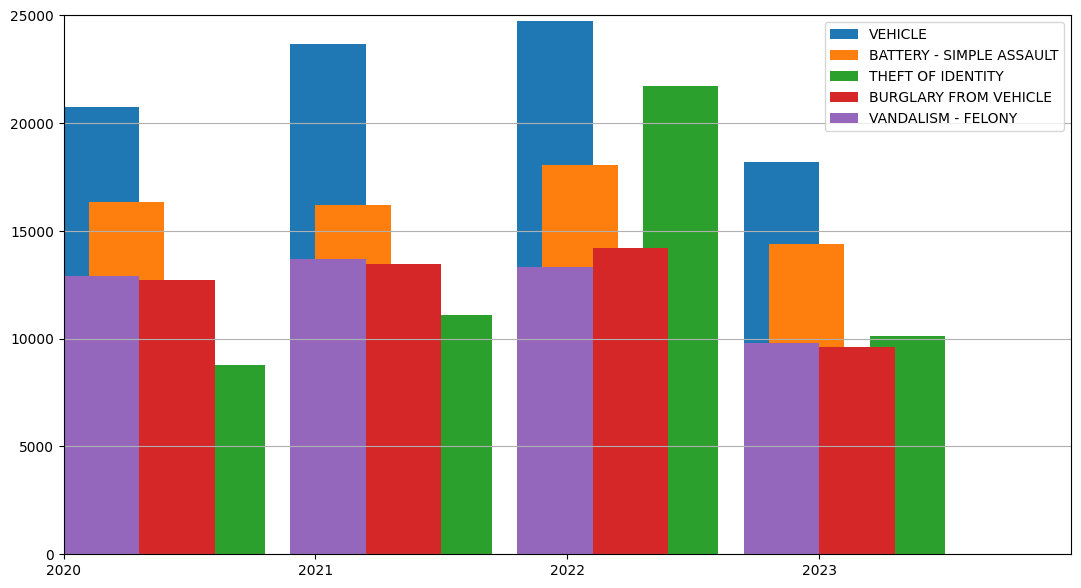

In [218]:

#Investigate any impact of major events or policy changes on crime rates.
f3 = plt.figure() 
ax3 = f3.add_subplot(111)
f3.set_figwidth(13) 
f3.set_figheight(7)
copy['year'] = copy['DATE OCC'].dt.year

#selecting top 5 crimes to analyze
print("Top 5 Crimes")
print(copy['Crm Cd Desc'].value_counts().head(5))


width = 0.1

plt.hist(copy['year'].loc[copy['Crm Cd Desc'] == 'VEHICLE - STOLEN'],label='VEHICLE')
plt.hist(copy['year'].loc[copy['Crm Cd Desc'] == 'BATTERY - SIMPLE ASSAULT']+width,label='BATTERY - SIMPLE ASSAULT')
plt.hist(copy['year'].loc[copy['Crm Cd Desc'] == 'THEFT OF IDENTITY']+0.5,label='THEFT OF IDENTITY')
plt.hist(copy['year'].loc[copy['Crm Cd Desc'] == 'BURGLARY FROM VEHICLE']+0.3,label='BURGLARY FROM VEHICLE')
plt.hist(copy['year'].loc[copy['Crm Cd Desc'] == 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'],label='VANDALISM - FELONY')
plt.xticks([2020,2021,2022,2023]) 
#plt.yticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000]) 
plt.xlim(2020,2024)
plt.ylim(0,25000)
plt.legend(loc='best')
plt.grid(axis='y')

Impact of Major Events: Identify major events or policy changes during the dataset period and analyze crime
rate changes before and after these events.

Answer : From the above plot, we noticed that the crime rates decreased after 2022. This is due to LaPD expanding their budget by $3.2B. LAPD hired hundreds of more officer which ultimately resulted in decrease of the crime rates.
https://www.latimes.com/california/story/2023-06-01/crime-is-down-in-la-as-city-plans-to-expand-lapd

8. Outliers and Anomalies: Use statistical methods or data visualization techniques to identify dataset outliers
and investigate unusual patterns.


below is the list of outlier value along with counts in the age column:
Vict Age
99.0     305
94.0      92
96.0      84
95.0      76
98.0      64
97.0      61
120.0      1
Name: count, dtype: int64
"

 We analyzed only age column for outlier as other columns cannot have outlier values other than NULL or 0. In the age column we observed an unusual pattern that,
 Crime of all sorts were commited on the people elderly people(above 90yrs).


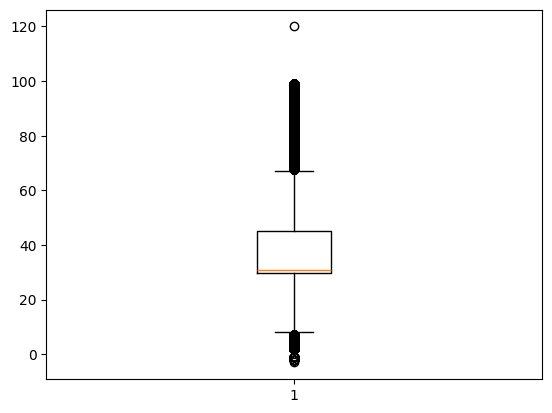

In [219]:
#identifying outliers in Age column
plt.boxplot(copy['Vict Age'])
# IQR
Q1 = np.percentile(copy['Vict Age'], 15, method='midpoint')
Q3 = np.percentile(copy['Vict Age'], 85, method='midpoint')
IQR = Q3 - Q1

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(copy['Vict Age']>=upper)
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(copy['Vict Age']<=lower)

upper_array = np.where(copy['Vict Age']>=upper)[0]
print("\nbelow is the list of outlier value along with counts in the age column:")
print(copy['Vict Age'].loc[upper_array].value_counts())

print(""""\n\n We analyzed only age column for outlier as other columns cannot have outlier values other than NULL or 0. In the age column we observed an unusual pattern that,
 Crime of all sorts were commited on the people elderly people(above 90yrs).""")

9. Demographic Factors: Analyze the dataset to identify any patterns or correlations between demographic
factors (e.g., age, gender) and specific types of crimes

Text(0, 0.5, 'Victim Age')

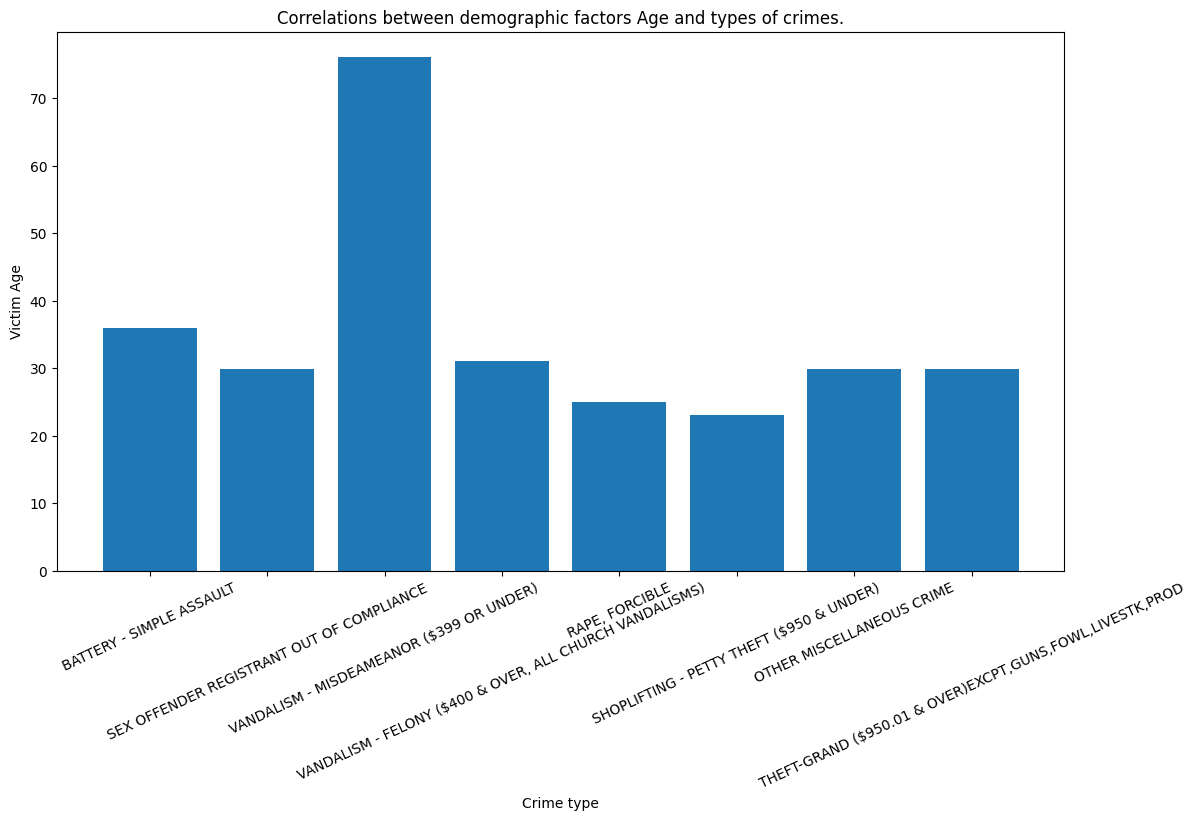

In [220]:
f3 = plt.figure() 
ax3 = f3.add_subplot(111)
f3.set_figwidth(13) 
f3.set_figheight(7)
plt.xticks(rotation = 25)
plt.bar(copy['Crm Cd Desc'].head(10),copy['Vict Age'].head(10))
    
plt.title("Correlations between demographic factors Age and types of crimes.")
plt.xlabel("Crime type")
plt.ylabel("Victim Age")


This plot shows that Females are more likel to be become victim of the crimes.


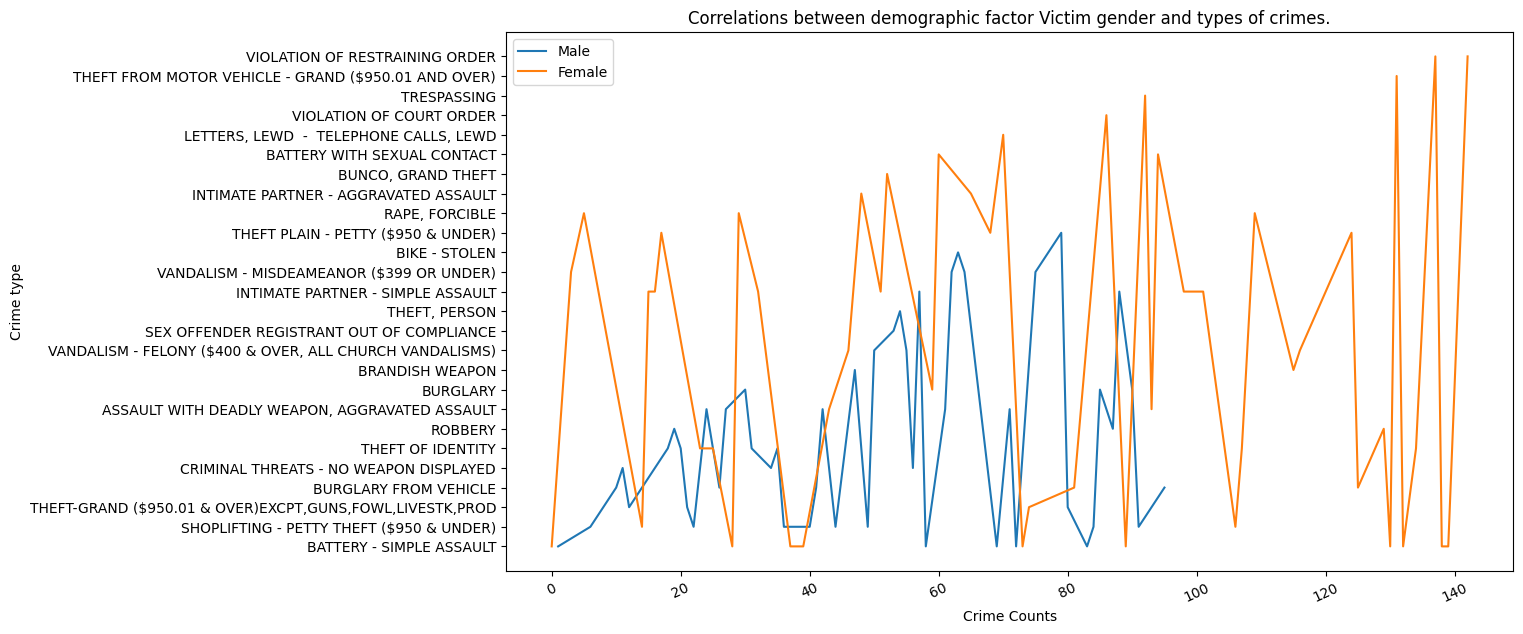

In [221]:
f3 = plt.figure() 
ax3 = f3.add_subplot(111)
f3.set_figwidth(13) 
f3.set_figheight(7)
plt.xticks(rotation = 25)
plt.plot(copy['Crm Cd Desc'].loc[copy['Vict Sex']== 'M'].head(50), label="Male")
plt.plot(copy['Crm Cd Desc'].loc[copy['Vict Sex']== 'F'].head(50), label="Female")
plt.title("Correlations between demographic factor Victim gender and types of crimes.")
plt.xlabel("Crime Counts")
plt.ylabel("Crime type")
plt.legend(loc="best")

print("\nThis plot shows that Females are more likel to be become victim of the crimes.")

10. Predicting Future Trends: Employ time series forecasting methods, such as ARIMA or Prophet, to predict
future crime trends based on historical data. Consider incorporating relevant
external factors into your models.

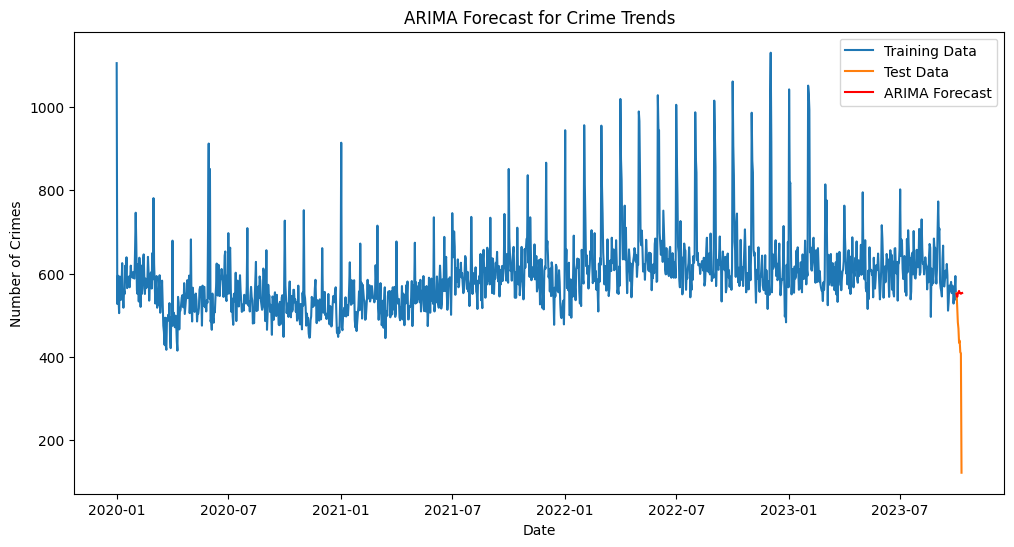

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta


# Preprocess the data
newDF = copy
newDF['DATE OCC'] = pd.to_datetime(newDF['DATE OCC'])
newDF.set_index('DATE OCC', inplace=True)
newDF.sort_index(inplace=True)

# Resample data to daily frequency and count the number of crimes per day
daily_crime_counts = newDF['DR_NO'].resample('D').count()

# Train-test split
train_data = daily_crime_counts['2020-01-01':'2023-09-30']
test_data = daily_crime_counts['2023-10-01':]

# Fit an ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the test set
start_date = test_data.index[0]
end_date = test_data.index[-1] + timedelta(days=1)
forecast = model_fit.predict(start=start_date, end=end_date, typ='levels')

# Plot the actual vs. predicted crime counts
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast for Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()
